# Table of Contents:
- Introduction
- problem Statement
- Objectives
- Code:
    - Installing & Importing Packages
    - Downloading & Reading Data
    - Exploratory Data Analysis
    - Data Preprocessing
    - Feature Extraction
    - Feature Importance
    - Feature Selection
    - Modeling
    - Evaluation
    - Conclustion

## Introduction 

## Problem Statement

## Objectives

## Code:
### 1) Installing Needed Packages

You might need to restart the kernel after installing them

In [276]:
# ! pip install ipywidgets
# ! pip install pandas-profiling
# ! pip install yfinance
# !pip install skforecast

### 2) Importing Needed libraries

In [277]:
import pandas as pd
import yfinance as yf
import numpy as np
from pandas_profiling import ProfileReport
from ipywidgets import widgets
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from skforecast.ForecasterAutoreg import ForecasterAutoreg
import arch
from arch import arch_model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 3) Downloading & Reading Datasets
- Downloading datasets from yahoo finance and reading the rest
- Adjusting the needed columns types from the datasets and choosing the final columns to be used
- Defining the set of rows that we will include in our analysis (Dates from 2/1/1990 till 2/11/2022) 
- Merging all datasets to form the final **df** which will be the dataset of our problem


#### TO DO: Make a function to read data and output the merged dataset instead of repeating the steps for all features

In [278]:
TNX = pd.read_csv('TNX.csv')
TNX['Date'] = pd.to_datetime(TNX['Date'])
TNX = TNX[['Date', 'Adj Close']]
TNX.columns = ['Date', 'TNX_Close']
TNX = TNX[(TNX['Date']>='1990-01-02') &(TNX['Date']<='2022-11-02')]

In [279]:
HSI = pd.read_csv('HSI.csv')
HSI['Date'] = pd.to_datetime(HSI['Date'])
HSI = HSI[['Date', 'Adj Close']]
HSI.columns = ['Date', 'HSI_Close']
HSI = HSI[(HSI['Date']>='1990-01-02') &(HSI['Date']<='2022-11-02')]

In [280]:
VKOSPI = pd.read_csv('VKOSPI.csv')
VKOSPI['Date'] = pd.to_datetime(VKOSPI['Date'])
VKOSPI = VKOSPI[['Date', 'Adj Close']]
VKOSPI.columns = ['Date', 'VKOSPI_Close']
VKOSPI = VKOSPI[(VKOSPI['Date']>='1990-01-02') &(VKOSPI['Date']<='2022-11-02')]

In [281]:
GSPC = pd.read_csv('GSPC.csv')
GSPC['Date'] = pd.to_datetime(GSPC['Date'])
GSPC = GSPC[['Date', 'Adj Close']]
GSPC.columns = ['Date', 'GSPC_Close']
GSPC = GSPC[(GSPC['Date']>='1990-01-02') &(GSPC['Date']<='2022-11-02')]

In [282]:
GSCI = pd.read_csv('GSCI.csv')
GSCI['Date'] = pd.to_datetime(GSCI['Date'])
GSCI = GSCI[['Date', 'Adj Close']]
GSCI.columns = ['Date', 'GSCI_Close']
GSCI = GSCI[(GSCI['Date']>='1990-01-02') &(GSCI['Date']<='2022-11-02')]

In [283]:
VIX = pd.read_csv('VIX.csv')
VIX['Date'] = pd.to_datetime(VIX['Date'])
VIX = VIX[['Date', 'Adj Close']]
VIX.columns = ['Date', 'VIX_Close']
VIX = VIX[(VIX['Date']>='1990-01-02') &(VIX['Date']<='2022-11-02')]

In [284]:
CPI = pd.read_csv('CPI Data.csv')
CPI['DATE'] = pd.to_datetime(CPI['DATE'])
CPI.columns = ['Date', 'CPI_Close']
CPI = CPI[(CPI['Date']>='1990-01-02') &(CPI['Date']<='2022-11-02')]

In [285]:
doll_ind = pd.read_csv('Dollar Index.csv')
doll_ind['Date'] = pd.to_datetime(doll_ind['Date'])
doll_ind = doll_ind[['Date', 'Adj Close']]
doll_ind.columns = ['Date', 'Dollar_Close']
doll_ind = doll_ind[(doll_ind['Date']>='1990-01-02') &(doll_ind['Date']<='2022-11-02')]

In [286]:
GDP = pd.read_csv('GDP.csv')
GDP['DATE'] = pd.to_datetime(GDP['DATE'])
GDP.columns = ['Date', 'GDP_Close']
GDP = GDP[(GDP['Date']>='1990-01-02') &(GDP['Date']<='2022-11-02')]

In [287]:
EPU = pd.read_csv('EPU.csv')
EPU['DATE'] = pd.to_datetime(EPU['DATE'])
EPU.columns = ['Date', 'EPU_Close']
EPU = EPU[(EPU['Date']>='1990-01-02') &(EPU['Date']<='2022-11-02')]

#### Merging all data into the final dataset

In [288]:
df = pd.merge(VIX, TNX,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, doll_ind,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, CPI,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, GDP,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, GSCI,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, EPU,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, GSPC,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, VKOSPI,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, HSI,  how='left', left_on=['Date'], right_on = ['Date'])
df['Date'] = pd.to_datetime(df['Date'])

In [289]:
df

,Date,VIX_Close,TNX_Close,Dollar_Close,CPI_Close,GDP_Close,GSCI_Close,EPU_Close,GSPC_Close,VKOSPI_Close,HSI_Close
0,1990-01-02,17.240000,7.940,94.290001,NaN,NaN,212.089996,169.23,359.690002,NaN,2838.100098
1,1990-01-03,18.190001,7.990,94.419998,NaN,NaN,215.639999,59.10,358.760010,NaN,2858.699951
2,1990-01-04,19.219999,7.980,92.519997,NaN,NaN,212.139999,76.38,355.670013,NaN,2868.000000
3,1990-01-05,20.110001,7.990,92.849998,NaN,NaN,206.919998,57.82,352.200012,NaN,2839.899902
4,1990-01-08,20.260000,8.020,92.050003,NaN,NaN,199.750000,126.54,353.790009,NaN,2816.000000
...,...,...,...,...,...,...,...,...,...,...,...
8270,2022-10-27,27.389999,3.937,110.589996,NaN,NaN,643.830017,154.05,3807.300049,2288.780029,15427.940430
8271,2022-10-28,25.750000,4.010,110.669998,NaN,NaN,636.530029,200.40,3901.060059,2268.399902,14863.059570
8272,2022-10-31,25.879999,4.077,111.529999,NaN,NaN,636.840027,163.03,3871.979980,2293.610107,14687.019531
8273,2022-11-01,25.809999,4.052,111.480003,NaN,NaN,641.530029,130.32,3856.100098,2335.219971,15455.269531


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8275 entries, 0 to 8274
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          8275 non-null   datetime64[ns]
 1   VIX_Close     8275 non-null   float64       
 2   TNX_Close     8243 non-null   float64       
 3   Dollar_Close  8273 non-null   float64       
 4   CPI_Close     253 non-null    float64       
 5   GDP_Close     71 non-null     float64       
 6   GSCI_Close    8274 non-null   float64       
 7   EPU_Close     8275 non-null   float64       
 8   GSPC_Close    8275 non-null   float64       
 9   VKOSPI_Close  6186 non-null   float64       
 10  HSI_Close     7912 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 775.8 KB


### 4) Exploratory Data Analysis
- Profile Reporting: Containing information about features: statistics and # number of missing values, etc.. and plots about distributions, interaction and correlation between features
- Time Series Plots for each feature
- Plots for target feature **VIX**; autocorrelation, seasonal decomposition, etc..
- Analysis of the major historical incidents 
- Observations and steps to do in preprocessing phase

In [294]:
# profile = ProfileReport(df, title="Pandas Profiling Report")

In [295]:
# profile.to_notebook_iframe()

In [296]:
# profile.to_file("EDA Report.html")

#### Observations:
- CPI & GDP have around 90% missing values - should be analyzed
- CPI & GDP are highly positively correlated - might need to drop one of them
- TNX is highly negatively correlated with CPI & GDP - might need to drop one or two of them

#### Correlation of all features with VIX 

In [127]:
df.corrwith(df["VIX_Close"]).sort_values(ascending=False)

VIX_Close       1.000000
EPU_Close       0.401285
Dollar_Close    0.162437
CPI_Close       0.082701
GDP_Close       0.047083
GSPC_Close     -0.001798
GSCI_Close     -0.031642
TNX_Close      -0.087714
HSI_Close      -0.091124
VKOSPI_Close   -0.261978
dtype: float64

#### Time Series Plots for all features

In [128]:
# defining function for plotting
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    sns.lineplot(data=df,x=x, y=y)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


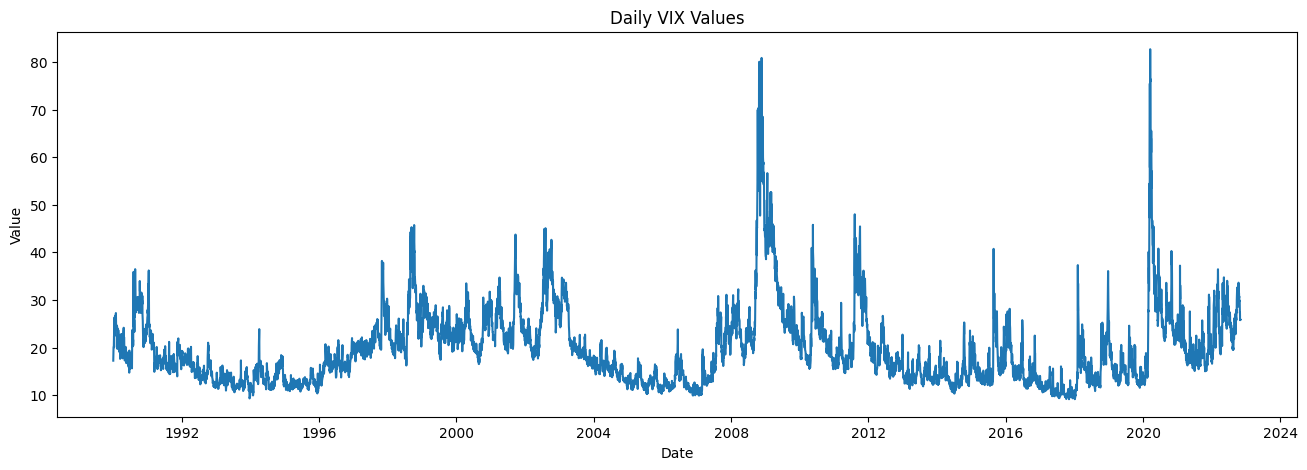

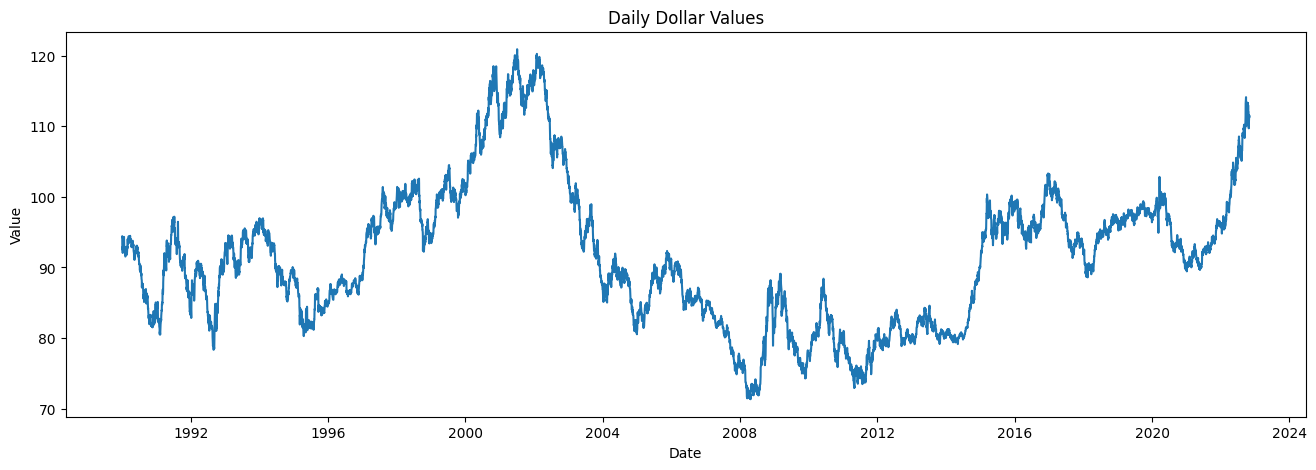

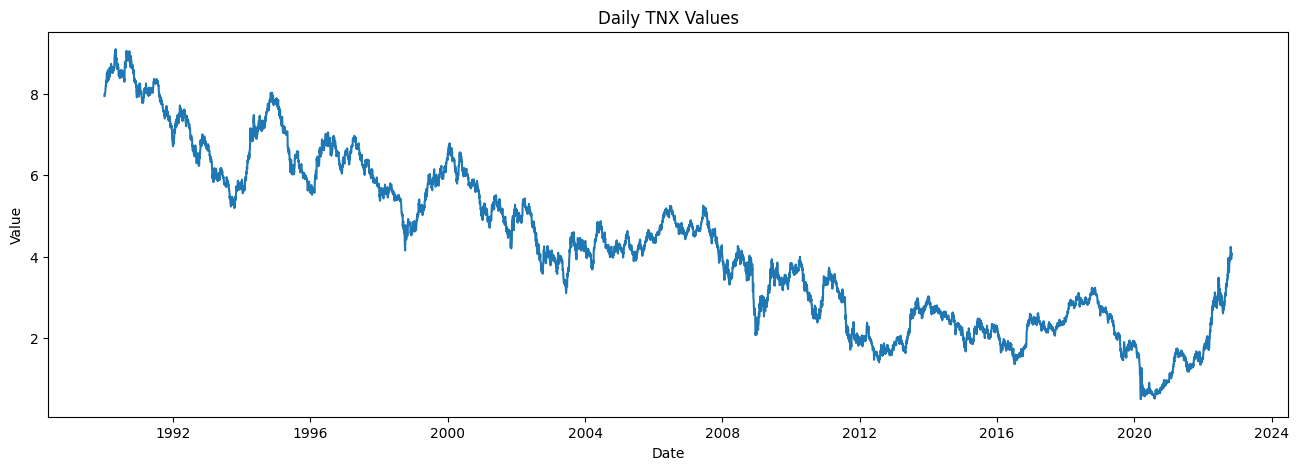

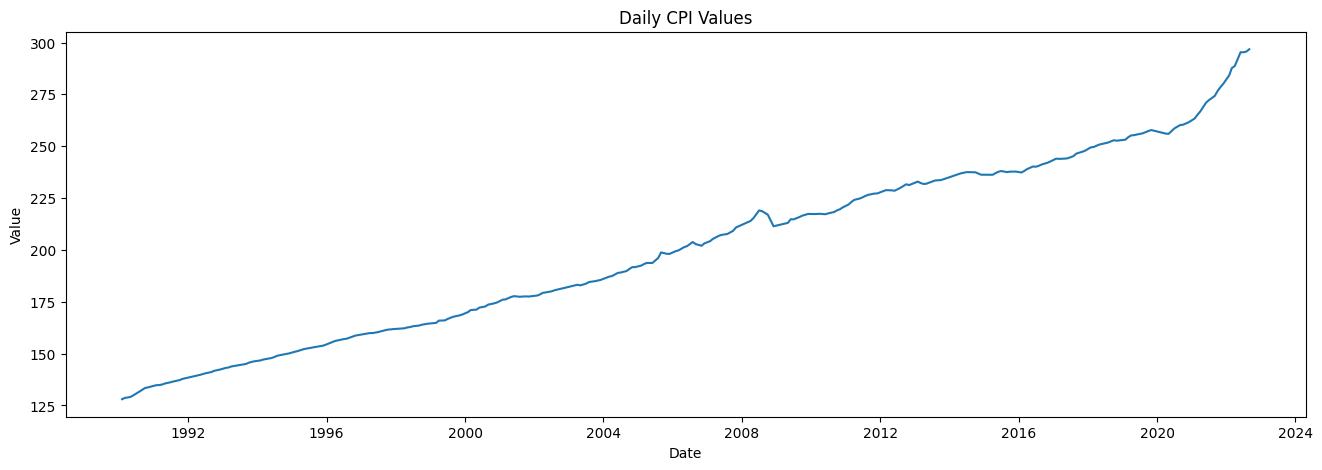

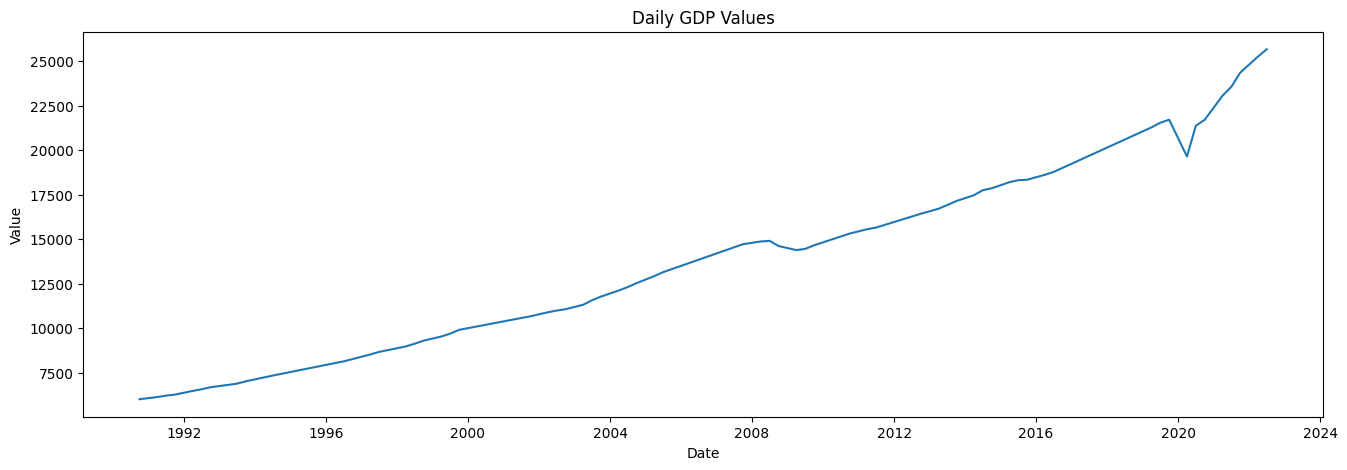

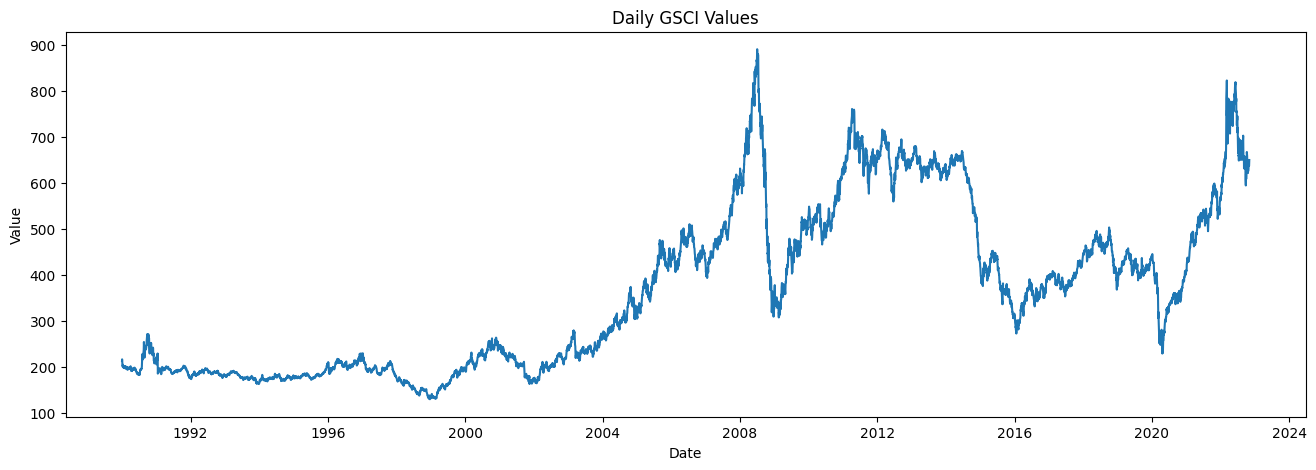

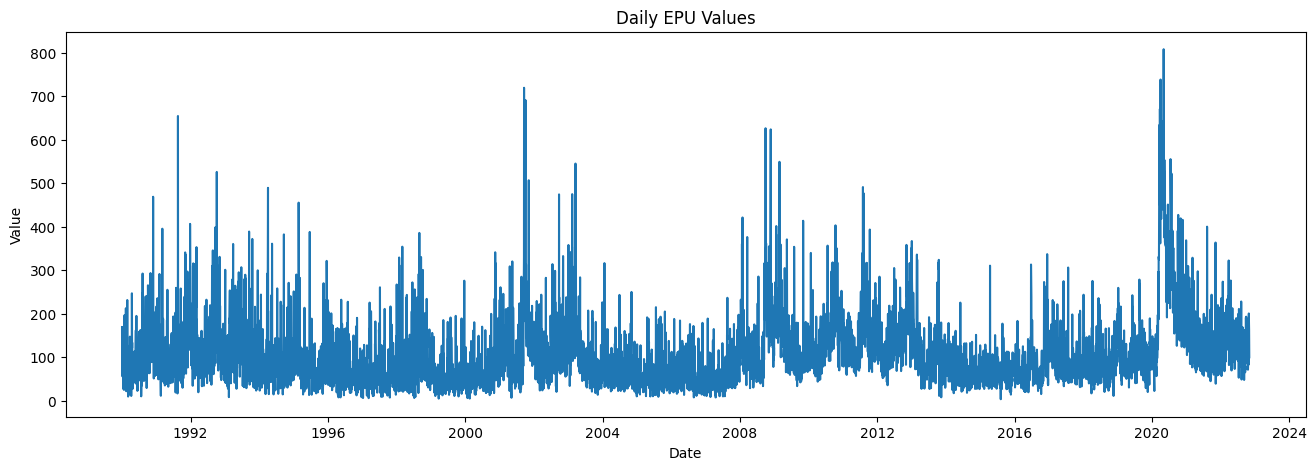

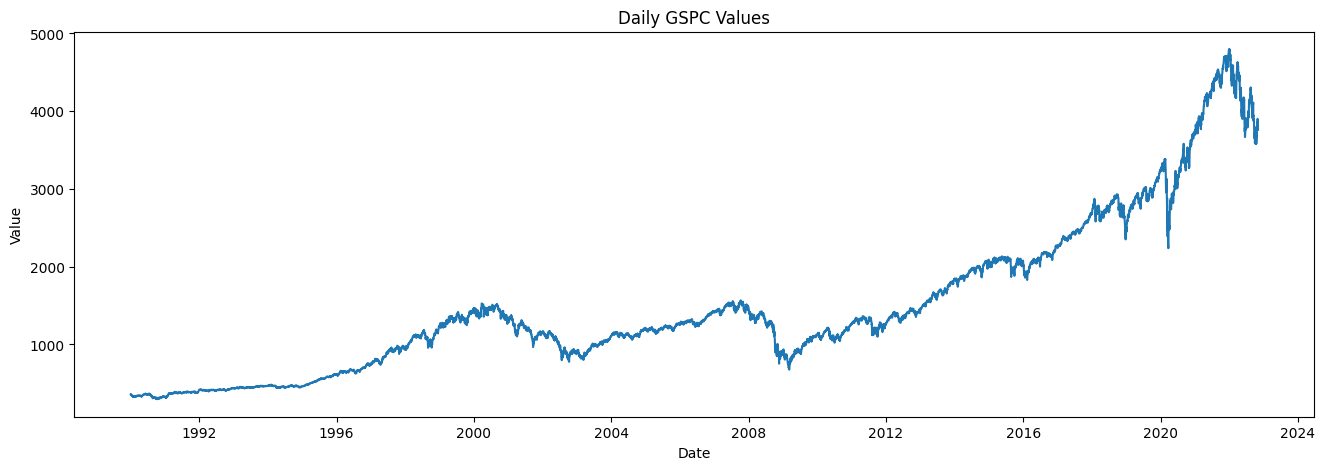

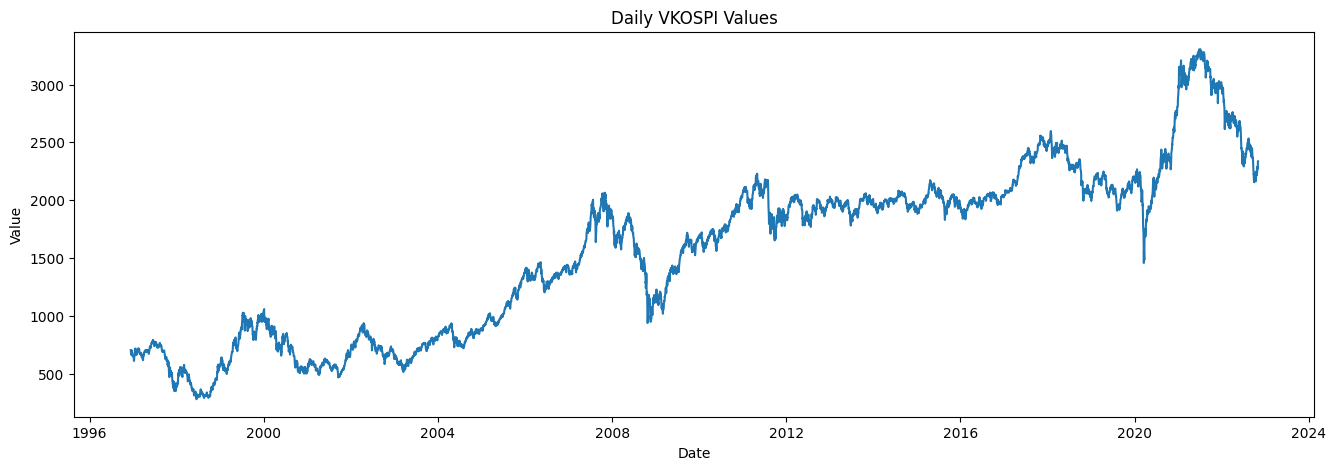

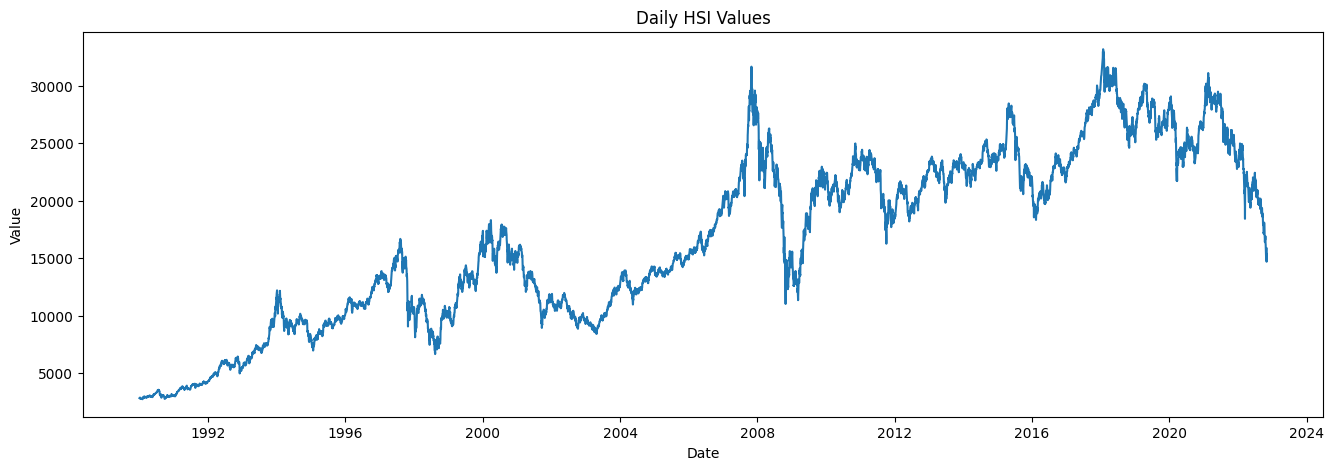

In [129]:
plot_df(df, 'Date', 'VIX_Close', title="Daily VIX Values", xlabel='Date', ylabel='Value', dpi=100)
plot_df(df, 'Date', 'Dollar_Close', title="Daily Dollar Values", xlabel='Date', ylabel='Value', dpi=100)
plot_df(df, 'Date', 'TNX_Close', title="Daily TNX Values", xlabel='Date', ylabel='Value', dpi=100)
plot_df(df, 'Date', 'CPI_Close', title="Daily CPI Values", xlabel='Date', ylabel='Value', dpi=100)
plot_df(df, 'Date', 'GDP_Close', title="Daily GDP Values", xlabel='Date', ylabel='Value', dpi=100)
plot_df(df, 'Date', 'GSCI_Close', title="Daily GSCI Values", xlabel='Date', ylabel='Value', dpi=100)
plot_df(df, 'Date', 'EPU_Close', title="Daily EPU Values", xlabel='Date', ylabel='Value', dpi=100)
plot_df(df, 'Date', 'GSPC_Close', title="Daily GSPC Values", xlabel='Date', ylabel='Value', dpi=100)
plot_df(df, 'Date', 'VKOSPI_Close', title="Daily VKOSPI Values", xlabel='Date', ylabel='Value', dpi=100)
plot_df(df, 'Date', 'HSI_Close', title="Daily HSI Values", xlabel='Date', ylabel='Value', dpi=100)

#### Plotting ACF and PACF for VIX

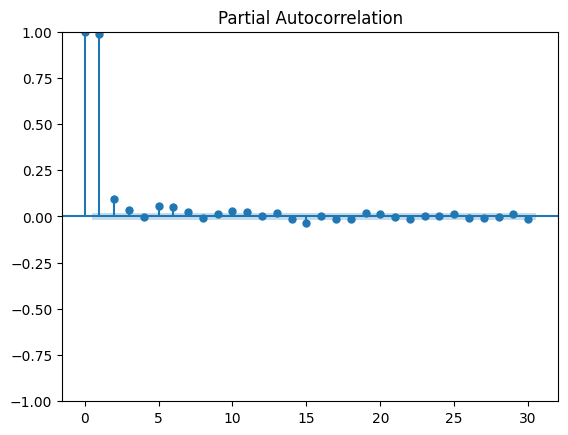

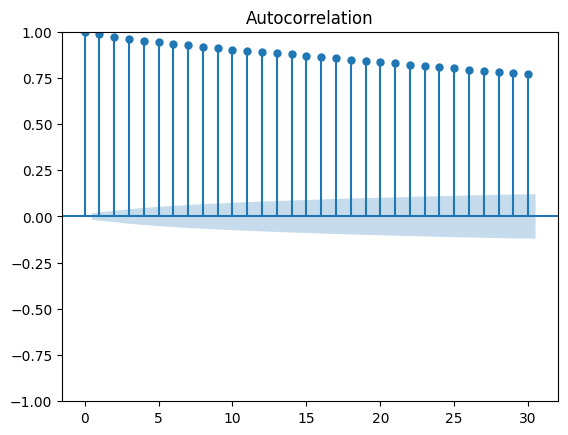

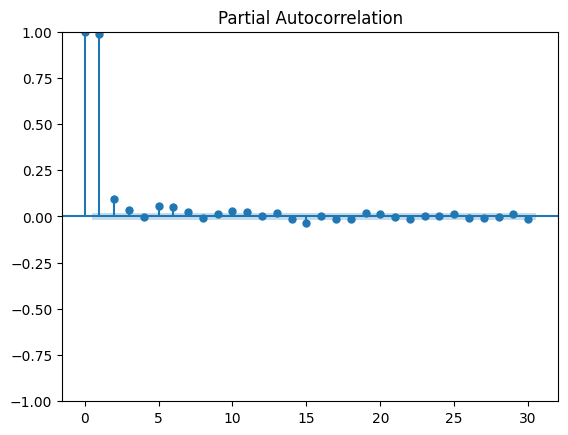

In [138]:
plot_acf(new_df.VIX_Close.tolist(), lags=30)
plot_pacf(new_df.VIX_Close.tolist(), lags=30)

##### Observations:
Based on ACF and PACF plots, we can see that the first lag has a very high correlation to the current VIX values. Lag 2 has also correlation, however not a large one like the first lag. After that, we can see a decreasing correlation to further lags.

### 5) Data Preprocessing
- Dealing with missing data
- Dealing with missing timestamps

#### Dealing with missing data

In [131]:
## 1st phase of filling missing values using forward fill
new_df = df
new_df.index = new_df['Date']
new_df.ffill(inplace=True)

In [132]:
## Adjusting the frequency to be daily because some days are missing 
new_df = new_df.asfreq("D")
new_df.drop(columns='Date', inplace=True)

In [133]:
## After adjusting the frequency extra rows were created with the missing dates with missing values 
## Filling the generated missing values using the forward fill then the remaining missing values to be filled with zeros
new_df.ffill(inplace=True)
new_df.fillna(0, inplace=True)

In [134]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11993 entries, 1990-01-02 to 2022-11-02
Freq: D
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VIX_Close     11993 non-null  float64
 1   TNX_Close     11993 non-null  float64
 2   Dollar_Close  11993 non-null  float64
 3   CPI_Close     11993 non-null  float64
 4   GDP_Close     11993 non-null  float64
 5   GSCI_Close    11993 non-null  float64
 6   EPU_Close     11993 non-null  float64
 7   GSPC_Close    11993 non-null  float64
 8   VKOSPI_Close  11993 non-null  float64
 9   HSI_Close     11993 non-null  float64
dtypes: float64(10)
memory usage: 1.0 MB


##### Extracting Final data file to csv

In [135]:
# new_df.to_csv("Final Data.csv")

##### Reading Final Data instead of running the previous steps again

In [32]:
new_df = pd.read_csv("Final Data.csv")
new_df['Date'] = pd.to_datetime(new_df['Date'])
new_df.index = new_df['Date']
new_df = new_df.asfreq("D")
# new_df.set_index(new_df['Date'],drop=True,inplace=True)

In [33]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11993 entries, 1990-01-02 to 2022-11-02
Freq: D
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          11993 non-null  datetime64[ns]
 1   VIX_Close     11993 non-null  float64       
 2   TNX_Close     11993 non-null  float64       
 3   Dollar_Close  11993 non-null  float64       
 4   CPI_Close     11993 non-null  float64       
 5   GDP_Close     11993 non-null  float64       
 6   GSCI_Close    11993 non-null  float64       
 7   EPU_Close     11993 non-null  float64       
 8   GSPC_Close    11993 non-null  float64       
 9   VKOSPI_Close  11993 non-null  float64       
 10  HSI_Close     11993 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 1.1 MB


#### Seasonal Decomposition

In [93]:
# # Need to fill missing values first

# from statsmodels.tsa.seasonal import seasonal_decompose
# from matplotlib import pyplot
# # df.index = df['Date']
# result = seasonal_decompose(new_df['VIX_Close'], model='multiplicative')
# result.plot()
# pyplot.show()

### 6) Feature Extraction


In [34]:
## Date-related Features

new_df['year']=new_df.index.year 
new_df['month']=new_df.index.month 
new_df['day']=new_df.index.day
new_df['dayofweek']=new_df.index.weekday
new_df['weekofyear']=new_df.index.weekofyear
new_df['quarter']=new_df.index.quarter
new_df['month_start']=new_df.index.is_month_start
new_df['month_end']=new_df.index.is_month_end
new_df['quarter_start']=new_df.index.is_quarter_start
new_df['quarter_end']=new_df.index.is_quarter_end
new_df['year_start']=new_df.index.is_year_start
new_df['year_end']=new_df.index.is_year_end
new_df['leap_year']=new_df.index.is_leap_year

In [35]:
new_df.shape

(11993, 24)

In [36]:
## Lag-related Features (Target Dependent Features)
new_df['lag_1'] = new_df['VIX_Close'].shift(1)
new_df['lag_2'] = new_df['VIX_Close'].shift(2)

In [37]:
new_df.shape

(11993, 26)

In [38]:
## Rolling Features 

def one_week_rolling_feature_extratror(data, col):
    ''' Returns dataframe appended with additional features: last week average, maximum, minimum & std'''
    data[col+'_prev_week_mean'] = data[col].rolling(window=7).mean()
    data[col+'_prev_week_max'] = data[col].rolling(window=7).max()
    data[col+'_prev_week_min'] = data[col].rolling(window=7).min()
    data[col+'_prev_week_std'] = data[col].rolling(window=7).std()
    return data

In [39]:
columns = ['TNX_Close','Dollar_Close','CPI_Close','GDP_Close','GSCI_Close','EPU_Close','GSPC_Close','VKOSPI_Close','HSI_Close']
for col in columns:
    new_df = one_week_rolling_feature_extratror(new_df, col)

In [40]:
new_df.shape

(11993, 62)

In [41]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11993 entries, 1990-01-02 to 2022-11-02
Freq: D
Data columns (total 62 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         11993 non-null  datetime64[ns]
 1   VIX_Close                    11993 non-null  float64       
 2   TNX_Close                    11993 non-null  float64       
 3   Dollar_Close                 11993 non-null  float64       
 4   CPI_Close                    11993 non-null  float64       
 5   GDP_Close                    11993 non-null  float64       
 6   GSCI_Close                   11993 non-null  float64       
 7   EPU_Close                    11993 non-null  float64       
 8   GSPC_Close                   11993 non-null  float64       
 9   VKOSPI_Close                 11993 non-null  float64       
 10  HSI_Close                    11993 non-null  float64       
 11  year            

In [42]:
## Filling missing values
new_df = new_df.bfill()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11993 entries, 1990-01-02 to 2022-11-02
Freq: D
Data columns (total 62 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         11993 non-null  datetime64[ns]
 1   VIX_Close                    11993 non-null  float64       
 2   TNX_Close                    11993 non-null  float64       
 3   Dollar_Close                 11993 non-null  float64       
 4   CPI_Close                    11993 non-null  float64       
 5   GDP_Close                    11993 non-null  float64       
 6   GSCI_Close                   11993 non-null  float64       
 7   EPU_Close                    11993 non-null  float64       
 8   GSPC_Close                   11993 non-null  float64       
 9   VKOSPI_Close                 11993 non-null  float64       
 10  HSI_Close                    11993 non-null  float64       
 11  year            

In [43]:
# new_df.to_csv('Final Data with Features.csv')

In [34]:
new_df=pd.read_csv('Final Data with Features.csv')
new_df['Date'] = pd.to_datetime(new_df['Date'])
new_df.index = new_df.Date
new_df.drop(columns = ['Date.1'], inplace=True)
new_df = new_df.asfreq("D")


In [35]:
new_df.index

DatetimeIndex(['1990-01-02', '1990-01-03', '1990-01-04', '1990-01-05',
               '1990-01-06', '1990-01-07', '1990-01-08', '1990-01-09',
               '1990-01-10', '1990-01-11',
               ...
               '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27',
               '2022-10-28', '2022-10-29', '2022-10-30', '2022-10-31',
               '2022-11-01', '2022-11-02'],
              dtype='datetime64[ns]', name='Date', length=11993, freq='D')

In [36]:
new_df

,Date,VIX_Close,TNX_Close,Dollar_Close,CPI_Close,GDP_Close,GSCI_Close,EPU_Close,GSPC_Close,VKOSPI_Close,...,GSPC_Close_prev_week_min,GSPC_Close_prev_week_std,VKOSPI_Close_prev_week_mean,VKOSPI_Close_prev_week_max,VKOSPI_Close_prev_week_min,VKOSPI_Close_prev_week_std,HSI_Close_prev_week_mean,HSI_Close_prev_week_max,HSI_Close_prev_week_min,HSI_Close_prev_week_std
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,1990-01-02,17.240000,7.940,94.290001,0.000,0.000,212.089996,169.23,359.690002,0.000000,...,352.200012,3.202403,0.000000,0.000000,0.000000,0.000000,2842.928537,2868.000000,2816.000000,16.599667
1990-01-03,1990-01-03,18.190001,7.990,94.419998,0.000,0.000,215.639999,59.10,358.760010,0.000000,...,352.200012,3.202403,0.000000,0.000000,0.000000,0.000000,2842.928537,2868.000000,2816.000000,16.599667
1990-01-04,1990-01-04,19.219999,7.980,92.519997,0.000,0.000,212.139999,76.38,355.670013,0.000000,...,352.200012,3.202403,0.000000,0.000000,0.000000,0.000000,2842.928537,2868.000000,2816.000000,16.599667
1990-01-05,1990-01-05,20.110001,7.990,92.849998,0.000,0.000,206.919998,57.82,352.200012,0.000000,...,352.200012,3.202403,0.000000,0.000000,0.000000,0.000000,2842.928537,2868.000000,2816.000000,16.599667
1990-01-06,1990-01-06,20.110001,7.990,92.849998,0.000,0.000,206.919998,57.82,352.200012,0.000000,...,352.200012,3.202403,0.000000,0.000000,0.000000,0.000000,2842.928537,2868.000000,2816.000000,16.599667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-29,2022-10-29,25.750000,4.010,110.669998,296.761,25663.289,636.530029,200.40,3901.060059,2268.399902,...,3752.750000,55.191475,2251.355713,2288.780029,2213.120117,25.634963,15289.875698,16211.120117,14863.059570,458.300862
2022-10-30,2022-10-30,25.750000,4.010,110.669998,296.761,25663.289,636.530029,200.40,3901.060059,2268.399902,...,3797.340088,45.742678,2259.252825,2288.780029,2235.070068,19.726889,15097.295619,15427.940430,14863.059570,235.976411
2022-10-31,2022-10-31,25.879999,4.077,111.529999,296.761,25663.289,636.840027,163.03,3871.979980,2293.610107,...,3807.300049,37.538679,2267.459996,2293.610107,2235.070068,20.455389,15026.771205,15427.940430,14687.019531,277.087568


### 7) Modeling:

- Split data to train and test
- Apply models



In [239]:
## Split data into train-test
## Testing only on last 7 days in datases
# returns = 100 * new_df.VIX_Close.pct_change().dropna()

train=new_df.loc['1990-01-03':'2021-12-31'] 
test=new_df.loc['2022-01-01':'2022-11-02'] 

# train_y=returns.loc[:'2021-12-31'] 
# test_y=returns.loc['2022-01-01':'2022-11-02'] 
# valid=new_df.loc['2020-01-01':'2022-11-02']

print("Training data shape =", train.shape, "\nTesting data shape =", test.shape)
# print("Training univariate data shape =", train_y.shape, "\nTesting univariate data shape =", test_y.shape)

Training data shape = (11686, 62) 
Testing data shape = (306, 62)


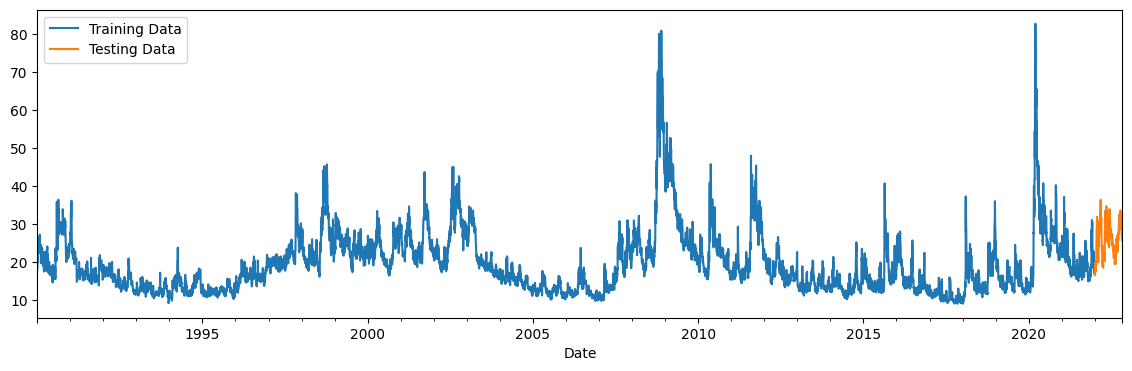

In [240]:
fig, ax=plt.subplots(figsize=(14, 4))
train['VIX_Close'].plot(ax=ax, label='Training Data')
test['VIX_Close'].plot(ax=ax, label='Testing Data')
# valid['VIX_Close'].plot(ax=ax, label='Validation Data')
ax.legend();

### Univariate Time Series Using Random Forest

In [241]:
# Create and train forecaster for univariate time series using Random Forest Regressor

rf_uni = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 1
             )

rf_uni.fit(y=train['VIX_Close'])
rf_uni

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1] 
Transformer for y: None 
Transformer for exog: None 
Window size: 1 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('1990-01-03 00:00:00'), Timestamp('2021-12-31 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-12-08 16:11:52 
Last fit date: 2022-12-08 16:11:53 
Skforecast version: 0.5.1 
Python version: 3.8.10 

In [242]:
## Calculating Predictions
predictions = rf_uni.predict(steps=len(test))
predictions.head()

2022-01-01    17.481073
2022-01-02    17.530129
2022-01-03    17.726086
2022-01-04    18.531688
2022-01-05    19.793390
Freq: D, Name: pred, dtype: float64

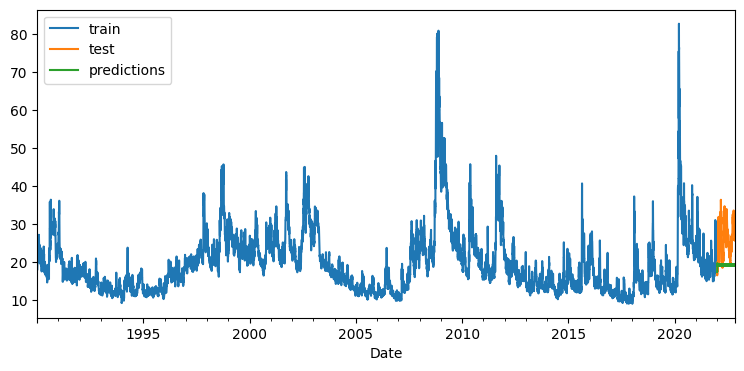

In [243]:
## Plotting Actual Vs Predicted

fig, ax = plt.subplots(figsize=(9, 4))
train['VIX_Close'].plot(ax=ax, label='train')
test['VIX_Close'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [244]:
## Calculating RMSE for predictions across actual

rf_uni_rmse = np.sqrt(mean_squared_error(
                y_true = test['VIX_Close'],
                y_pred = predictions
            ))

print(f"Test error (rmse): {rf_uni_rmse}")

Test error (rmse): 7.994144412277776


### Univariate Time Series Using SVM

In [245]:
# Create and train forecaster for univariate time series using Random Forest Regressor

svr_uni = ForecasterAutoreg(
                regressor = SVR(),
                lags      = 1
             )

svr_uni.fit(y=train['VIX_Close'])
svr_uni

ForecasterAutoreg 
Regressor: SVR() 
Lags: [1] 
Transformer for y: None 
Transformer for exog: None 
Window size: 1 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('1990-01-03 00:00:00'), Timestamp('2021-12-31 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False} 
Creation date: 2022-12-08 16:12:55 
Last fit date: 2022-12-08 16:13:00 
Skforecast version: 0.5.1 
Python version: 3.8.10 

In [246]:
## Calculating Predictions
predictions = svr_uni.predict(steps=len(test))
predictions.head()

2022-01-01    17.163799
2022-01-02    17.109541
2022-01-03    17.057183
2022-01-04    17.006678
2022-01-05    16.957980
Freq: D, Name: pred, dtype: float64

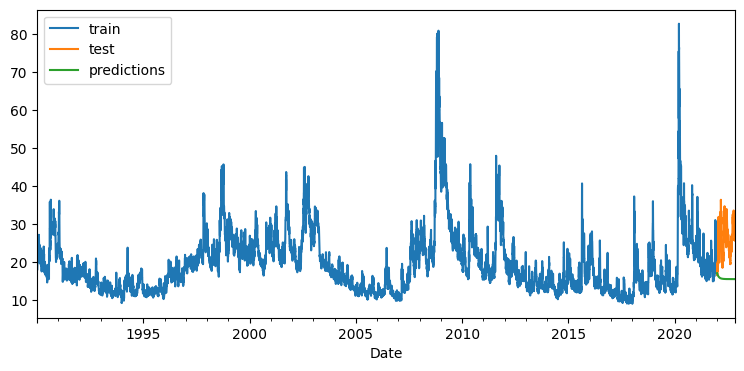

In [247]:
## Plotting Actual Vs Predicted

fig, ax = plt.subplots(figsize=(9, 4))
train['VIX_Close'].plot(ax=ax, label='train')
test['VIX_Close'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [248]:
## Calculating RMSE for predictions across actual

svr_uni_rmse = np.sqrt(mean_squared_error(
                y_true = test['VIX_Close'],
                y_pred = predictions
            ))

print(f"Test error (rmse): {svr_uni_rmse}")

Test error (rmse): 11.211601237103405


### Multivariate Time Series Using Random Forest

In [249]:
## Create and train forecaster for multivariate time series using Random Forest Regressor
rf_multi = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 1
             )

rf_multi.fit(y=train['VIX_Close'], exog=train.drop(columns=['Date','VIX_Close']))
rf_multi

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1] 
Transformer for y: None 
Transformer for exog: None 
Window size: 1 
Included exogenous: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['TNX_Close', 'Dollar_Close', 'CPI_Close', 'GDP_Close', 'GSCI_Close', 'EPU_Close', 'GSPC_Close', 'VKOSPI_Close', 'HSI_Close', 'year', 'month', 'day', 'dayofweek', 'weekofyear', 'quarter', 'month_start', 'month_end', 'quarter_start', 'quarter_end', 'year_start', 'year_end', 'leap_year', 'lag_1', 'lag_2', 'TNX_Close_prev_week_mean', 'TNX_Close_prev_week_max', 'TNX_Close_prev_week_min', 'TNX_Close_prev_week_std', 'Dollar_Close_prev_week_mean', 'Dollar_Close_prev_week_max', 'Dollar_Close_prev_week_min', 'Dollar_Close_prev_week_std', 'CPI_Close_prev_week_mean', 'CPI_Close_prev_week_max', 'CPI_Close_prev_week_min', 'CPI_Close_prev_week_std', 'GDP_Close_prev_week_mean', 'GDP_Close_prev_week_max', 'GDP_Close_prev_week_min', 'GD

In [250]:
## Calculating Predictions
predictions = rf_multi.predict(steps=len(test), exog=test.drop(columns=['Date','VIX_Close']))
predictions.head()

2022-01-01    17.3026
2022-01-02    17.3424
2022-01-03    18.0125
2022-01-04    17.6889
2022-01-05    17.6039
Freq: D, Name: pred, dtype: float64

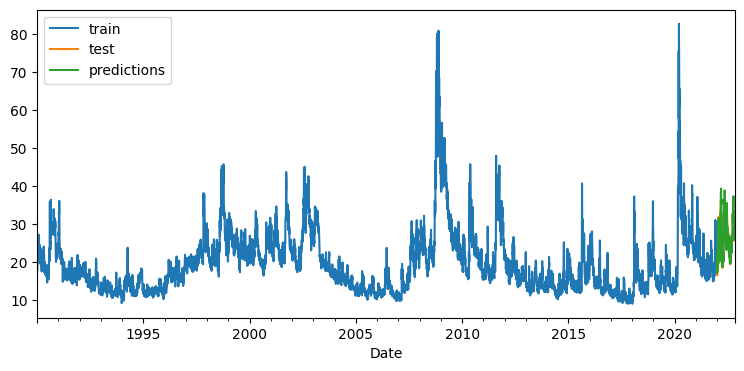

In [251]:
## Plotting Actual Vs Predicted
fig, ax = plt.subplots(figsize=(9, 4))
train['VIX_Close'].plot(ax=ax, label='train')
test['VIX_Close'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [252]:
## Calculating RMSE for predictions across actual

rf_multi_rmse = np.sqrt(mean_squared_error(
                y_true = test['VIX_Close'],
                y_pred = predictions
            ))

print(f"Test error (rmse): {rf_multi_rmse}")

Test error (rmse): 2.435973643755951


### Multivariate Time Series Using SVM

In [253]:
from sklearn.svm import SVR

## Create and train forecaster for multivariate time series using Support Vector Regressor
svr_multi = ForecasterAutoreg(
                regressor = SVR(),
                lags      = 1
             )

svr_multi.fit(y=train['VIX_Close'], exog=train.drop(columns=['Date','VIX_Close']))
svr_multi

ForecasterAutoreg 
Regressor: SVR() 
Lags: [1] 
Transformer for y: None 
Transformer for exog: None 
Window size: 1 
Included exogenous: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['TNX_Close', 'Dollar_Close', 'CPI_Close', 'GDP_Close', 'GSCI_Close', 'EPU_Close', 'GSPC_Close', 'VKOSPI_Close', 'HSI_Close', 'year', 'month', 'day', 'dayofweek', 'weekofyear', 'quarter', 'month_start', 'month_end', 'quarter_start', 'quarter_end', 'year_start', 'year_end', 'leap_year', 'lag_1', 'lag_2', 'TNX_Close_prev_week_mean', 'TNX_Close_prev_week_max', 'TNX_Close_prev_week_min', 'TNX_Close_prev_week_std', 'Dollar_Close_prev_week_mean', 'Dollar_Close_prev_week_max', 'Dollar_Close_prev_week_min', 'Dollar_Close_prev_week_std', 'CPI_Close_prev_week_mean', 'CPI_Close_prev_week_max', 'CPI_Close_prev_week_min', 'CPI_Close_prev_week_std', 'GDP_Close_prev_week_mean', 'GDP_Close_prev_week_max', 'GDP_Close_prev_week_min', 'GDP_Close_prev_week_std', 'GSCI_Clos

In [254]:
## Calculating Predictions
predictions = svr_multi.predict(steps=len(test), exog=test.drop(columns=['Date','VIX_Close']))
predictions.head()

2022-01-01    19.589828
2022-01-02    19.593956
2022-01-03    19.633558
2022-01-04    19.645573
2022-01-05    19.870075
Freq: D, Name: pred, dtype: float64

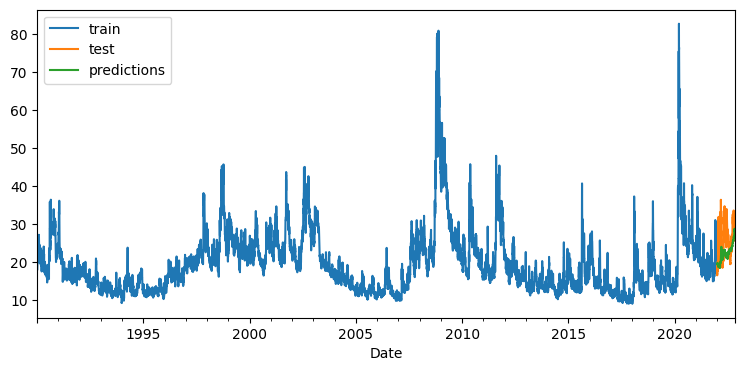

In [255]:
## Plotting Actual Vs Predicted
fig, ax = plt.subplots(figsize=(9, 4))
train['VIX_Close'].plot(ax=ax, label='train')
test['VIX_Close'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [256]:
## Calculating RMSE for predictions across actual

svr_multi_rmse = np.sqrt(mean_squared_error(
                y_true = test['VIX_Close'],
                y_pred = predictions
            ))

print(f"Test error (rmse): {svr_multi_rmse}")

Test error (rmse): 5.656051154006185


In [257]:
results = pd.DataFrame(columns=['Univariate','Multivariate'],index=['Random Forest','SVR'])
results.loc['Random Forest','Univariate'] = round(rf_uni_rmse,3)
results.loc['Random Forest','Multivariate'] = round(rf_multi_rmse,3)
results.loc['SVR','Univariate'] = round(svr_uni_rmse,3)
results.loc['SVR','Multivariate'] = round(svr_multi_rmse,3)

In [258]:
results

,Univariate,Multivariate
Random Forest,7.994,2.436
SVR,11.212,5.656


#### Observations:

We can see that the multivariate Random Forest model is the best performing model which we will check the feature importance for.

### Feature Importance 
- Top correlated Features

In [259]:
feat_imp = rf_multi.get_feature_importance()

feat_imp = feat_imp.sort_values('importance',ascending=False)

In [260]:
feat_imp[:10]

,feature,importance
0,lag_1,0.511261
23,lag_1,0.457184
24,lag_2,0.005962
52,GSPC_Close_prev_week_std,0.002379
44,GSCI_Close_prev_week_std,0.001335
7,GSPC_Close,0.001295
56,VKOSPI_Close_prev_week_std,0.001247
6,EPU_Close,0.001211
32,Dollar_Close_prev_week_std,0.001142
13,dayofweek,0.001117


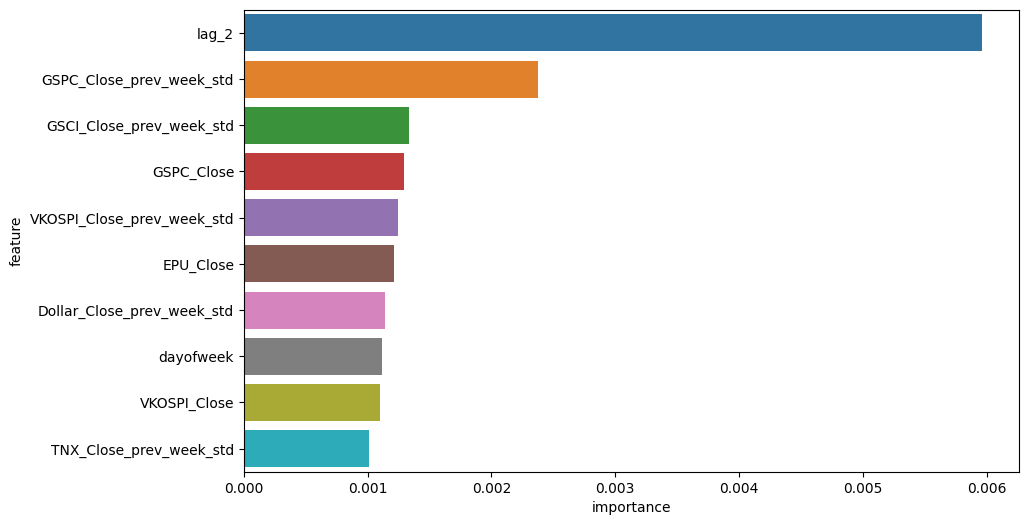

In [261]:
plt.figure(figsize=(10,6))
sns.barplot(y=feat_imp[2:12]['feature'], x=feat_imp[2:12]['importance']);

### Univariate Time Series Using Arch Model

Date
1990-01-03     358.760010
1990-01-04     355.670013
1990-01-05     352.200012
1990-01-06     352.200012
1990-01-07     352.200012
                 ...     
2021-12-27    4791.189941
2021-12-28    4786.350098
2021-12-29    4793.060059
2021-12-30    4778.729980
2021-12-31    4766.180176
Freq: D, Name: GSPC_Close, Length: 11686, dtype: float64

In [264]:
returns = 100 * new_df.GSPC_Close.pct_change().dropna()
realized_vol = returns.rolling(5).std()

Text(0.5, 1.0, 'S&P Volatility')

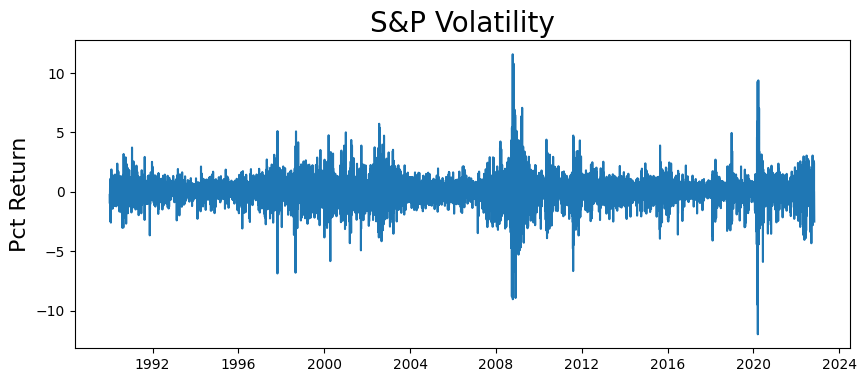

In [265]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('S&P Volatility', fontsize=20)


In [266]:
bic_arch = []

for p in range(1, 5):
    for q in range(1, 5):
        arch = arch_model(returns, vol='ARCH', p=p, o=0, q=q)\
                .fit(last_obs="2021-12-31",disp='off')
        bic_arch.append(arch.bic)
        if arch.bic == np.min(bic_arch):
            best_param = p, q

            
arch = arch_model(returns, vol='ARCH', p=best_param[0], o=0, q=best_param[1])\
        .fit(last_obs="2021-12-31",disp='off')

print(best_param)
print(arch.summary())


(4, 4)
                      Constant Mean - ARCH Model Results                      
Dep. Variable:             GSPC_Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -14502.1
Distribution:                  Normal   AIC:                           29016.3
Method:            Maximum Likelihood   BIC:                           29060.5
                                        No. Observations:                11685
Date:                Thu, Dec 08 2022   Df Residuals:                    11684
Time:                        16:21:25   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0464  8.196e-03      5.663  1.489e

In [267]:
forecast = arch.forecast()
forecast_arch = forecast

In [270]:
realized_vol.iloc[-len(test):]

Date
2022-01-01    0.182775
2022-01-02    0.188740
2022-01-03    0.375330
2022-01-04    0.339032
2022-01-05    0.974485
                ...   
2022-10-29    1.424990
2022-10-30    1.297250
2022-10-31    1.298489
2022-11-01    1.269525
2022-11-02    1.037058
Freq: D, Name: GSPC_Close, Length: 306, dtype: float64

In [269]:
forecast_arch.variance.iloc[-len(test):]

,h.1
Date,
2022-01-01,0.444086
2022-01-02,0.451778
2022-01-03,0.507575
2022-01-04,0.457108
2022-01-05,1.217874
...,...
2022-10-29,1.058782
2022-10-30,0.970651
2022-10-31,1.478214


In [268]:
from sklearn.metrics import mean_squared_error as mse
rmse_arch = np.sqrt(mse(realized_vol.iloc[-len(test):],np.sqrt(forecast_arch.variance.iloc[-len(test):] 
                         )))
print('The RMSE value of ARCH model is {:.4f}'.format(rmse_arch))

The RMSE value of ARCH model is 0.3244


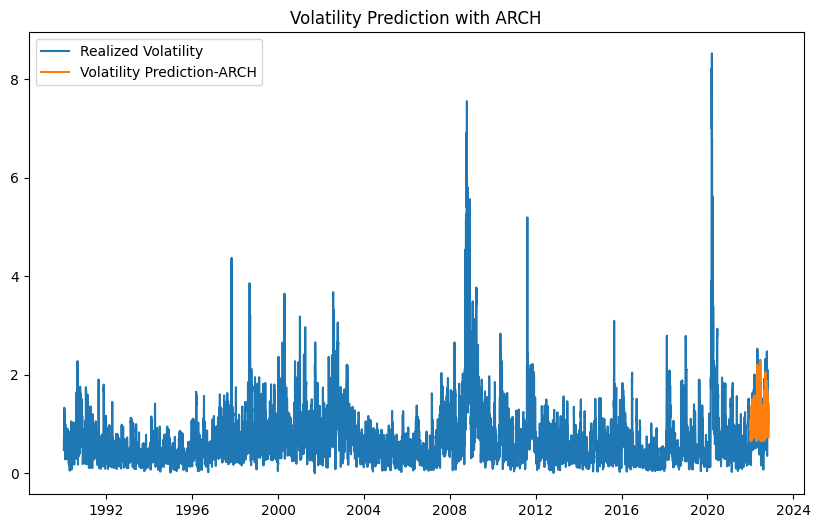

In [271]:
plt.figure(figsize=(10,6))
plt.plot(realized_vol, label='Realized Volatility')
plt.plot(np.sqrt(forecast_arch.variance.iloc[-len(test):]) , 
         label='Volatility Prediction-ARCH')
plt.title('Volatility Prediction with ARCH', fontsize=12)
plt.legend()
plt.show()

### Univariate Time Series Using Garch Model

In [272]:
bic_garch = []

for p in range(1, 5):
    for q in range(1, 5):
        garch = arch_model(returns, vol='GARCH', p=p, o=0, q=q)\
                .fit(last_obs="2021-12-31",disp='off')
        bic_garch.append(garch.bic)
        if garch.bic == np.min(bic_garch):
            best_param = p, q

            
garch = arch_model(returns, vol='GARCH', p=best_param[0], o=0, q=best_param[1])\
        .fit(last_obs="2021-12-31",disp='off')
print(best_param)
print(garch.summary())


(4, 4)
                     Constant Mean - GARCH Model Results                      
Dep. Variable:             GSPC_Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -13274.1
Distribution:                  Normal   AIC:                           26568.1
Method:            Maximum Likelihood   BIC:                           26641.8
                                        No. Observations:                11685
Date:                Thu, Dec 08 2022   Df Residuals:                    11684
Time:                        16:24:56   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0427  6.289e-03      6.789  1.132e

In [273]:
forecast = garch.forecast()
forecast_garch = forecast

In [274]:
from sklearn.metrics import mean_squared_error as mse
rmse_garch = np.sqrt(mse(realized_vol.iloc[-len(test):],np.sqrt(forecast_garch.variance.iloc[-len(test):] 
                         )))
print('The RMSE value of GARCH model is {:.4f}'.format(rmse_garch))

The RMSE value of GARCH model is 0.3911


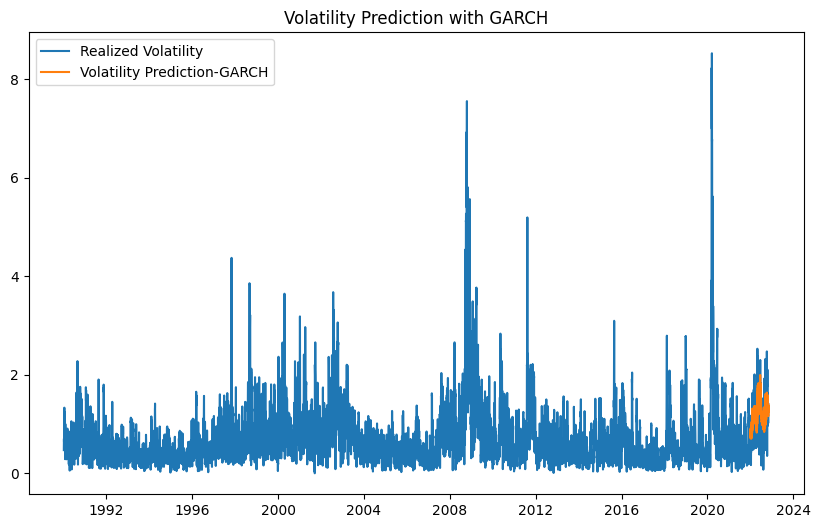

In [275]:
plt.figure(figsize=(10,6))
plt.plot(realized_vol, label='Realized Volatility')
plt.plot(np.sqrt(forecast_garch.variance.iloc[-len(test):]) , 
         label='Volatility Prediction-GARCH')
plt.title('Volatility Prediction with GARCH', fontsize=12)
plt.legend()
plt.show()

### Trying ARCH models with Exogenous variables

In [177]:
# exog = new_df[1:]

# exog = exog[['TNX_Close','Dollar_Close']]
# exog.columns = ['x0','x1']

# exog_fcast = test[['TNX_Close','Dollar_Close']]
# exog_fcast.columns = ['x0','x1']

# dict(exog_fcast)

In [176]:
# garch_exog = arch_model(y= returns, x = exog,
#                         mean='ARX',lags=1, vol='GARCH', p=1, o=0, q=1).fit(last_obs="2021-12-31",disp='off')
# print(garch_exog.summary())

In [173]:
# forecast_exog = garch_exog.forecast(start="2022-01-01",horizon = 306, x=dict(exog_fcast))
# forecast_garch_exog = forecast_exog

In [174]:
# forecast_exog.variance.iloc[-len(test):]

In [175]:
# from sklearn.metrics import mean_squared_error as mse
# rmse_garch = np.sqrt(mse(realized_vol.iloc[-len(test):],np.sqrt(forecast_exog.variance.iloc[-len(test):] 
#                          )))
# print('The RMSE value of GARCH model is {:.4f}'.format(rmse_garch))